# Prueba David Romero - Colombina

Aunque para las compañías es muy importante conseguir nuevos clientes, también es importante
retener a sus clientes actuales. Un modelo de predicción de fuga permite a través de los datos
recolectados como frecuencia de compras, cantidad de productos comprados, valor de compra,
entre otros; anticipar qué clientes pueden continuar o dejar una compañía. Así, realizar cambios
proactivos en sus esfuerzos de retención que reducen las tasas de abandono.
Colombina está interesado en saber qué clientes tienen mayor probabilidad de no volver a comprar
ninguno de sus productos. El negocio ha establecido que un cliente que no compra durante 2 meses
es un cliente fugado.

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from matplotlib.ticker import PercentFormatter
#import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Para análisis de datos:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn preprocesamiento-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn para seleccion de modelo--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn para evaluación de modelos---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#librerías para visualización---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#básicas--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib


Primero vamos a cargar los datos

In [2]:
df = pd.read_table(r"D:\Users\Usuario\Documents\Colombina\prueba_DS.txt",sep=',')


In [3]:
df.head()

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda
0,7503277849,2021-11-01,18134244,28424,72.0,42,1.000,347.76,COP
1,7503277849,2021-11-01,18134244,26780,6.0,42,6.000,781.40,COP
2,7503277849,2021-11-01,18134244,28846,72.0,42,1.000,309.05,COP
3,7503277849,2021-11-01,18134244,6572,18.0,42,0.375,124.59,COP
4,7503277849,2021-11-01,18134244,28850,1.0,42,1.000,478.87,COP


Vemos que la variable moneda solo contiene COP, entonces podemos sacarla del análisis

In [4]:
df.Moneda.unique()

array(['COP'], dtype=object)

In [5]:
df = df.drop(columns='Moneda')

In [6]:
df.dtypes

Doc_vtas      int64
Fecha        object
Solic         int64
Material      int64
Cnt_uni     float64
sect_mat      int64
Cnt_cart    float64
ValN_Pos    float64
dtype: object

In [7]:
df['fecha_c'] = pd.to_datetime(df['Fecha'])

In [8]:
df.head()

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,fecha_c
0,7503277849,2021-11-01,18134244,28424,72.0,42,1.000,347.76,2021-11-01
1,7503277849,2021-11-01,18134244,26780,6.0,42,6.000,781.40,2021-11-01
2,7503277849,2021-11-01,18134244,28846,72.0,42,1.000,309.05,2021-11-01
3,7503277849,2021-11-01,18134244,6572,18.0,42,0.375,124.59,2021-11-01
4,7503277849,2021-11-01,18134244,28850,1.0,42,1.000,478.87,2021-11-01


Vemos que Julio es un mes que no esta completo, entonces para hacer la predicción tomaremos datos desde el final de Junio

In [9]:
df=df[df['fecha_c']< '2022-07-01']

In [10]:
df['fecha_c'] = df['fecha_c'].dt.to_period('M')

In [11]:
df.head()

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,fecha_c
0,7503277849,2021-11-01,18134244,28424,72.0,42,1.000,347.76,2021-11
1,7503277849,2021-11-01,18134244,26780,6.0,42,6.000,781.40,2021-11
2,7503277849,2021-11-01,18134244,28846,72.0,42,1.000,309.05,2021-11
3,7503277849,2021-11-01,18134244,6572,18.0,42,0.375,124.59,2021-11
4,7503277849,2021-11-01,18134244,28850,1.0,42,1.000,478.87,2021-11


# Definicion del Target

El negocio ha establecido que un cliente que no compra durante 2 meses
es un cliente fugado. 

In [12]:
Ventas = df.groupby(['fecha_c','Solic'], as_index=False)['Cnt_uni'].sum()

In [13]:
Ventas.shape

(511626, 3)

In [14]:
Ventas = Ventas[Ventas.Cnt_uni>=0]

In [15]:
Ventas.shape

(511626, 3)

In [16]:
Ventas['Presente'] = 1

In [17]:
Ventas.head()

,fecha_c,Solic,Cnt_uni,Presente
0,2021-11,49128,443.0,1
1,2021-11,69792,67.0,1
2,2021-11,69868,193.0,1
3,2021-11,70430,34.0,1
4,2021-11,70566,152.0,1


In [18]:
Registros = Ventas.pivot_table(index='Solic', columns='fecha_c',
                    aggfunc={'Presente': np.sum}).fillna(0).reset_index()

Definimos aquel cliente que se fue como el que tenga dos ceros en el ultimo mes, es decir que la suma de su presencia en los ultimos dos meses sea 0

In [19]:
Registros.head()

Solic Presente                                                  \
fecha_c         2021-11 2021-12 2022-01 2022-02 2022-03 2022-04 2022-05   
0        49128      1.0     1.0     1.0     1.0     1.0     1.0     1.0   
1        69792      1.0     1.0     1.0     1.0     1.0     1.0     1.0   
2        69868      1.0     1.0     1.0     1.0     1.0     1.0     1.0   
3        70334      0.0     0.0     0.0     1.0     1.0     0.0     1.0   
4        70430      1.0     1.0     1.0     1.0     1.0     1.0     1.0   

                 
fecha_c 2022-06  
0           1.0  
1           1.0  
2           1.0  
3           0.0  
4           1.0

In [20]:
Registros.columns =Registros.columns.droplevel()

In [21]:
Registros.columns = range(Registros.columns.size)

In [22]:
Registros.columns = ['Solic','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06']

In [23]:
Registros.head()

,Solic,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,49128,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,69792,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,69868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,70334,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,70430,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
Registros['suma'] = Registros['2022-05'] + Registros['2022-06']

In [25]:
Registros['Target'] = np.where(Registros['suma']==0,1,0)

In [26]:
Registros.shape

(79640, 11)

In [27]:
Registros.head()

,Solic,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,suma,Target
0,49128,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0
1,69792,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0
2,69868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0
3,70334,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0
4,70430,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0


In [28]:
salida_julio = Registros[['Solic','Target']]

# Base para modelo

Vamos a incluir la variables de sectores que nos indica la cantidad de productos que se ha comprado por sector

In [29]:
sectores = df.pivot_table(index='Solic', columns='sect_mat',
                    aggfunc={'Cnt_uni': np.sum}).fillna(0).reset_index()

In [30]:
sectores.columns =sectores.columns.droplevel()
sectores.columns = range(sectores.columns.size)


In [31]:

sectores.columns = ['Solic','30','36','39','42','48','51','54','60','63','66','72','84','87','90','99','108','111','114','246','255','258','261']

In [32]:
df.head()

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,fecha_c
0,7503277849,2021-11-01,18134244,28424,72.0,42,1.000,347.76,2021-11
1,7503277849,2021-11-01,18134244,26780,6.0,42,6.000,781.40,2021-11
2,7503277849,2021-11-01,18134244,28846,72.0,42,1.000,309.05,2021-11
3,7503277849,2021-11-01,18134244,6572,18.0,42,0.375,124.59,2021-11
4,7503277849,2021-11-01,18134244,28850,1.0,42,1.000,478.87,2021-11


In [33]:
df.sect_mat.unique()

array([ 42,  60,  66,  30,  36, 108,  54,  51,  63,  99,  48,  90,  72,
       111,  84, 261, 246, 114, 258,  39, 255,  87], dtype=int64)

Añadiremos al modelo la suma de las cantidades vendidas y su precio

In [34]:
ventas = df.groupby('Solic',as_index=False)[['Cnt_uni','Cnt_cart','ValN_Pos']].sum()

In [35]:
ventas.head()

,Solic,Cnt_uni,Cnt_cart,ValN_Pos
0,49128,2251.0,320.631941,140023.57
1,69792,497.0,20.705561,12621.08
2,69868,1182.0,39.570018,26320.71
3,70334,101.0,9.063893,6416.46
4,70430,315.0,16.881683,11342.03


In [36]:
df_t = ventas.merge(salida_julio,on='Solic',how='left')

In [37]:
df_t = df_t.merge(sectores,on='Solic',how='left')

In [38]:
df_t.head()

,Solic,Cnt_uni,Cnt_cart,ValN_Pos,Target,30,36,39,42,48,51,54,60,63,66,72,84,87,90,99,108,111,114,246,255,258,261
0,49128,2251.0,320.631941,140023.57,0,498.0,129.0,0.0,0.0,516.0,0.0,0.0,905.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69792,497.0,20.705561,12621.08,0,186.0,20.0,0.0,186.0,44.0,12.0,12.0,31.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,69868,1182.0,39.570018,26320.71,0,181.0,37.0,0.0,745.0,108.0,0.0,16.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70334,101.0,9.063893,6416.46,0,24.0,20.0,0.0,0.0,0.0,0.0,26.0,23.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70430,315.0,16.881683,11342.03,0,101.0,12.0,0.0,94.0,40.0,0.0,13.0,26.0,1.0,0.0,1.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_t.Target.value_counts()

0    70014
1     9626
Name: Target, dtype: int64

# EDA 

Vemos que en particular los clientes que se nos fugan de Colombina son aquellos que han gastado menos dinero en nuestros productos

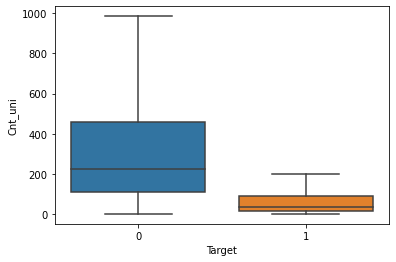

In [40]:
sns.boxplot(x="Target", y="Cnt_uni", data=df_t, showfliers = False);

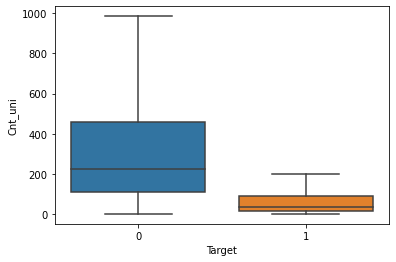

In [41]:
sns.boxplot(x="Target", y="Cnt_uni", data=df_t, showfliers = False);

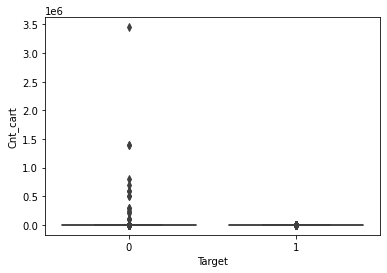

In [42]:
sns.boxplot(x="Target", y="Cnt_cart", data=df_t, showfliers = True);

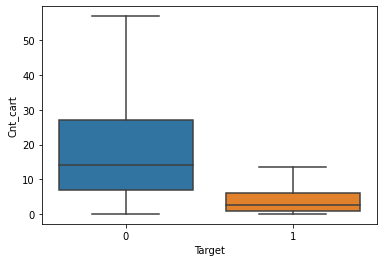

In [43]:
sns.boxplot(x="Target", y="Cnt_cart", data=df_t, showfliers = False);

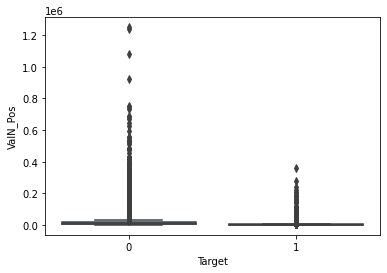

In [44]:
sns.boxplot(x="Target", y="ValN_Pos", data=df_t, showfliers = True);

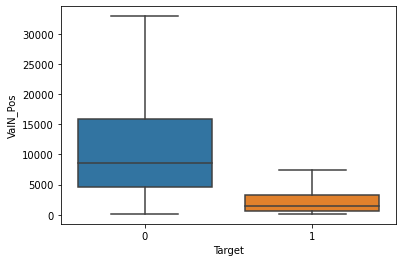

In [45]:
sns.boxplot(x="Target", y="ValN_Pos", data=df_t, showfliers = False);

In [46]:
corr = df_t.corr()
corr.style.background_gradient(cmap='coolwarm')

,Solic,Cnt_uni,Cnt_cart,ValN_Pos,Target,30,36,39,42,48,51,54,60,63,66,72,84,87,90,99,108,111,114,246,255,258,261
Solic,1.000000,-0.007730,-0.005247,-0.049543,0.078530,-0.057460,-0.044819,-0.004037,-0.036953,-0.071325,0.008754,-0.043682,-0.037511,-0.016554,-0.041245,-0.073478,-0.026102,-0.005135,-0.008851,-0.069579,-0.019777,-0.045310,0.025393,0.005583,-0.001473,0.008401,0.007422
Cnt_uni,-0.007730,1.000000,0.999321,0.056395,-0.010125,0.042486,0.038607,0.005069,0.050678,0.034430,0.025711,0.008253,0.039938,0.016848,0.019709,0.009379,0.017894,0.999239,0.021237,0.002868,0.024155,0.001956,0.006186,0.035341,0.000888,0.008187,0.023679
Cnt_cart,-0.005247,0.999321,1.000000,0.027134,-0.003837,0.015791,0.016358,0.002531,0.020143,0.012010,0.013616,0.002076,0.016042,0.007917,0.011731,0.002790,0.003998,0.999996,0.004625,-0.001685,0.011442,-0.000330,0.002317,0.032407,-0.000029,0.006356,0.021558
ValN_Pos,-0.049543,0.056395,0.027134,1.000000,-0.141301,0.649531,0.599114,0.108877,0.532676,0.545516,0.304630,0.208287,0.692751,0.257896,0.223367,0.179541,0.352731,0.024614,0.539809,0.100806,0.357988,0.046497,0.123095,0.059544,0.030583,0.026179,0.036753
Target,0.078530,-0.010125,-0.003837,-0.141301,1.000000,-0.139898,-0.175422,-0.005554,-0.102138,-0.125416,-0.091208,-0.063329,-0.117063,-0.061541,-0.088078,-0.108163,-0.106313,-0.003453,-0.052409,-0.055937,-0.091239,-0.028165,-0.065336,-0.029821,-0.003118,-0.035168,-0.027610
30,-0.057460,0.042486,0.015791,0.649531,-0.139898,1.000000,0.511582,0.038174,0.321009,0.354100,0.244807,0.097443,0.453842,0.156195,0.191688,0.159554,0.291959,0.013975,0.257171,0.087857,0.346648,0.053379,0.096404,0.043351,0.021755,0.016353,0.023290
36,-0.044819,0.038607,0.016358,0.599114,-0.175422,0.511582,1.000000,0.048184,0.311220,0.332284,0.277651,0.154020,0.549015,0.183852,0.282144,0.220264,0.341535,0.014689,0.306342,0.067192,0.339110,0.038545,0.145139,0.048040,0.019000,0.025435,0.030564
39,-0.004037,0.005069,0.002531,0.108877,-0.005554,0.038174,0.048184,1.000000,0.045989,0.068777,0.036689,0.000202,0.067953,0.010741,0.014710,0.011525,0.032156,0.002304,0.138153,0.011620,0.023038,0.005559,0.006564,-0.000628,0.015491,-0.000926,-0.000563
42,-0.036953,0.050678,0.020143,0.532676,-0.102138,0.321009,0.311220,0.045989,1.000000,0.419808,0.207190,0.037846,0.355273,0.195963,0.040283,0.082738,0.224933,0.018668,0.324978,0.046917,0.181946,0.033528,0.051909,0.056331,0.010513,0.032519,0.043384
48,-0.071325,0.034430,0.012010,0.545516,-0.125416,0.354100,0.332284,0.068777,0.419808,1.000000,0.191227,0.033423,0.383816,0.142842,0.152089,0.105513,0.283310,0.010812,0.408284,0.090763,0.198341,0.045438,0.060685,0.041478,0.017812,0.023805,0.030764


In [47]:
df_t.head()

,Solic,Cnt_uni,Cnt_cart,ValN_Pos,Target,30,36,39,42,48,51,54,60,63,66,72,84,87,90,99,108,111,114,246,255,258,261
0,49128,2251.0,320.631941,140023.57,0,498.0,129.0,0.0,0.0,516.0,0.0,0.0,905.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69792,497.0,20.705561,12621.08,0,186.0,20.0,0.0,186.0,44.0,12.0,12.0,31.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,69868,1182.0,39.570018,26320.71,0,181.0,37.0,0.0,745.0,108.0,0.0,16.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70334,101.0,9.063893,6416.46,0,24.0,20.0,0.0,0.0,0.0,0.0,26.0,23.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70430,315.0,16.881683,11342.03,0,101.0,12.0,0.0,94.0,40.0,0.0,13.0,26.0,1.0,0.0,1.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelo

Para el modelo compararemos dos, un RandomForest y un Xgboost y el que nos de mejor porcentaje de recall será el usado

In [48]:
df_t.head()

,Solic,Cnt_uni,Cnt_cart,ValN_Pos,Target,30,36,39,42,48,51,54,60,63,66,72,84,87,90,99,108,111,114,246,255,258,261
0,49128,2251.0,320.631941,140023.57,0,498.0,129.0,0.0,0.0,516.0,0.0,0.0,905.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69792,497.0,20.705561,12621.08,0,186.0,20.0,0.0,186.0,44.0,12.0,12.0,31.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,69868,1182.0,39.570018,26320.71,0,181.0,37.0,0.0,745.0,108.0,0.0,16.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70334,101.0,9.063893,6416.46,0,24.0,20.0,0.0,0.0,0.0,0.0,26.0,23.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70430,315.0,16.881683,11342.03,0,101.0,12.0,0.0,94.0,40.0,0.0,13.0,26.0,1.0,0.0,1.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_t.shape

(79640, 27)

In [50]:
X1 = df_t.iloc[:, 1:4]
X2 = df_t.iloc[:, 5:27]

In [51]:
X = pd.concat([X1, X2], axis=1)

In [52]:

y = df_t.iloc[:, 4]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=3)

In [54]:
print("Número de personas en X_train dataset: ", X_train.shape)
print("Número de personas en y_train dataset: ", y_train.shape)
print("Número de personas en X_test dataset: ", X_test.shape)
print("Número de personas en y_test dataset: ", y_test.shape)

Número de personas en X_train dataset:  (59730, 25)
Número de personas en y_train dataset:  (59730,)
Número de personas en X_test dataset:  (19910, 25)
Número de personas en y_test dataset:  (19910,)


In [55]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

In [56]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [57]:
# Modelo elegido
    
classifier = RandomForestClassifier(n_estimators = 23, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)


# prediciendo resultados

#y_pred = classifier.predict(X_test)
y_pred = classifier.predict_proba(X_test)[:,1] >= 0.35

# evaluando el modelo

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.899046   0.579422  0.521109   0.54872  0.531813


<Figure size 2016x1440 with 0 Axes>

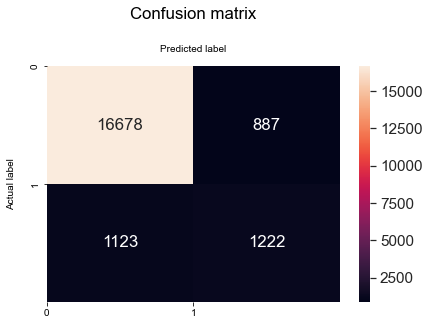

In [58]:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

In [59]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
# make predictions for test data
y_pred = model.predict(X_test)
y_pred = model.predict_proba(X_test)[:,1] >= 0.35
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.901808   0.588395  0.553518  0.570424  0.560159


<Figure size 2016x1440 with 0 Axes>

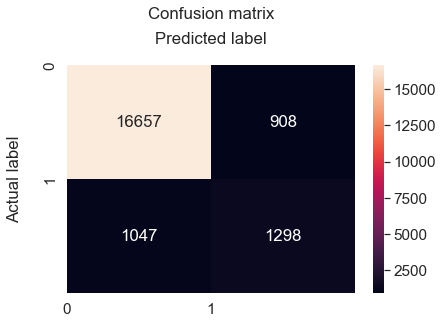

In [62]:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

Escogemos el modelo de xgboost y ahora vamos a ver cuales son las variables más importantes para predecir la fuga

# Variables importantes

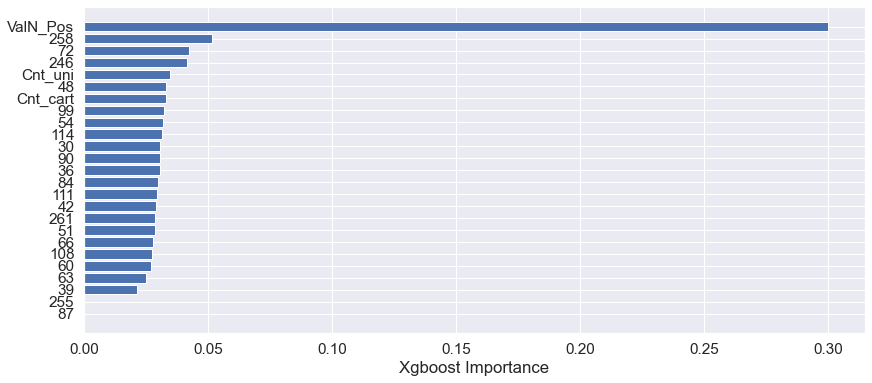

In [63]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(14, 6))
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Importance");

Vemos que las variables más importantes son:
    
    - ValN_Pos: el dinero que gastan nuestro clientes con nosoros
    - 252: un sector importante
    - 72: otro sector importante

# Prediciendo toda la data

In [64]:
df2 = pd.read_table(r"D:\Users\Usuario\Documents\Colombina\prueba_DS.txt",sep=',')


In [65]:
df2 = df2.drop(columns='Moneda')

In [66]:
sectores1 = df2.pivot_table(index='Solic', columns='sect_mat',
                    aggfunc={'Cnt_uni': np.sum}).fillna(0).reset_index()

In [67]:
sectores1.columns =sectores1.columns.droplevel()
sectores1.columns = range(sectores.columns.size)
sectores1.columns = ['Solic','30','36','39','42','48','51','54','60','63','66','72','84','87','90','99','108','111','114','246','255','258','261']

In [68]:
ventas1 = df2.groupby('Solic',as_index=False)[['Cnt_uni','Cnt_cart','ValN_Pos']].sum()

In [69]:
df_test = ventas1.merge(sectores1,on='Solic',how='left')

In [70]:
df_test.head()

,Solic,Cnt_uni,Cnt_cart,ValN_Pos,30,36,39,42,48,51,54,60,63,66,72,84,87,90,99,108,111,114,246,255,258,261
0,49128,2426.0,340.951384,149603.37,524.0,129.0,0.0,0.0,540.0,0.0,0.0,1007.0,0.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69792,503.0,21.052784,12892.77,187.0,21.0,0.0,186.0,44.0,12.0,15.0,32.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,69838,116.0,5.388889,2359.99,51.0,11.0,0.0,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69868,1237.0,41.545022,28290.25,192.0,41.0,0.0,763.0,120.0,0.0,18.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70334,101.0,9.063893,6416.46,24.0,20.0,0.0,0.0,0.0,0.0,26.0,23.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
df_test.shape

(80294, 26)

In [72]:
Xt = df_test.iloc[:, 1:26]

In [73]:
X_train2 = pd.DataFrame(sc_X.fit_transform(Xt))
X_train2.columns = Xt.columns.values
X_train2.index = Xt.index.values
X_train = X_train2

In [74]:
y_pred1 = model.predict_proba(X_train)[:,1] >= 0.35
y_pred1 = y_pred1*1

In [75]:
df_test['prediccion']= y_pred1

In [76]:
salida = df_test[['Solic','prediccion']]

In [77]:
salida.to_csv(r"D:\Users\Usuario\Documents\Colombina\salida.csv")